## Support Vector Machine ##

In [3]:
!pip install ISLP

import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=ed17d81837ea9e97fece9545b2ccd34bf32601603c2d50fe7e7e204cb976b6dc
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [6]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [7]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

- **SVM (선형경계)**

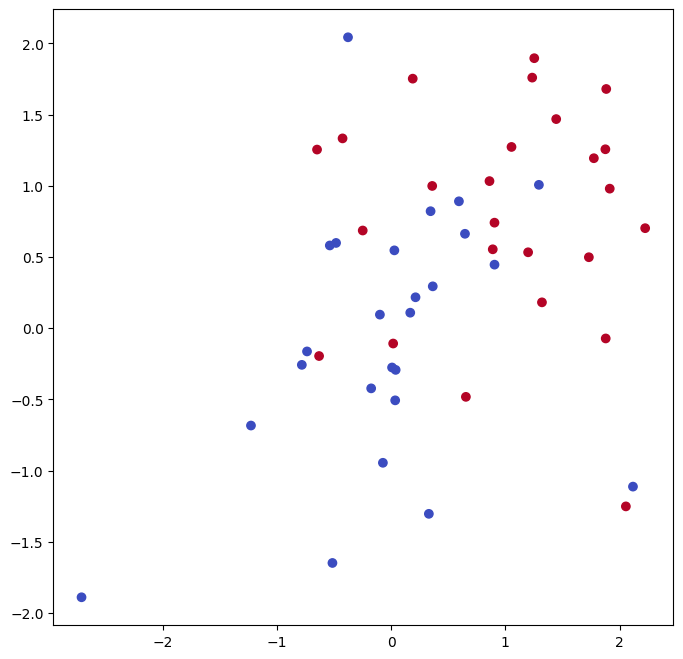

In [9]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],X[:,1], c=y, cmap=cm.coolwarm);

In [12]:
svm_linear =  SVC(C=10, kernel='linear')
svm_linear.fit(X,y)

SVC(C=10, kernel='linear')

###### - 결과 그래픽화 (넘나드는 것을 크게 허용)


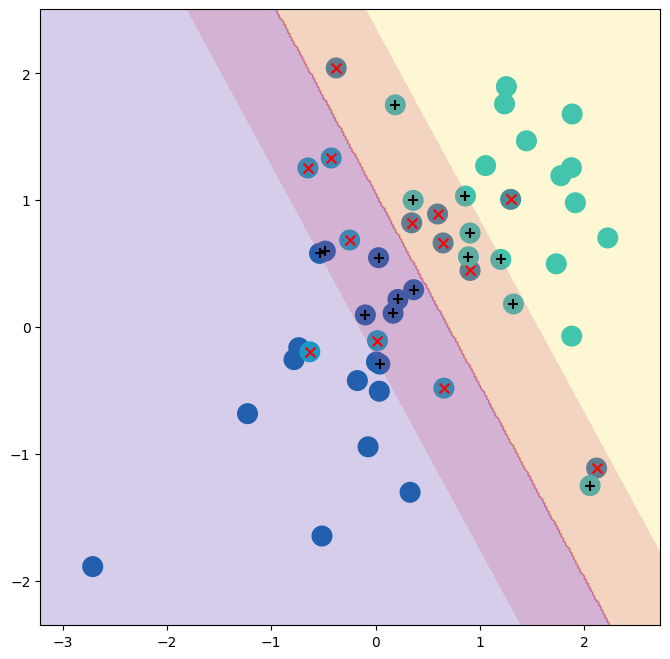

In [13]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,y, svm_linear , ax=ax)

###### - 결과 그래픽화 (넘나드는 것을 다소 적게 허용)


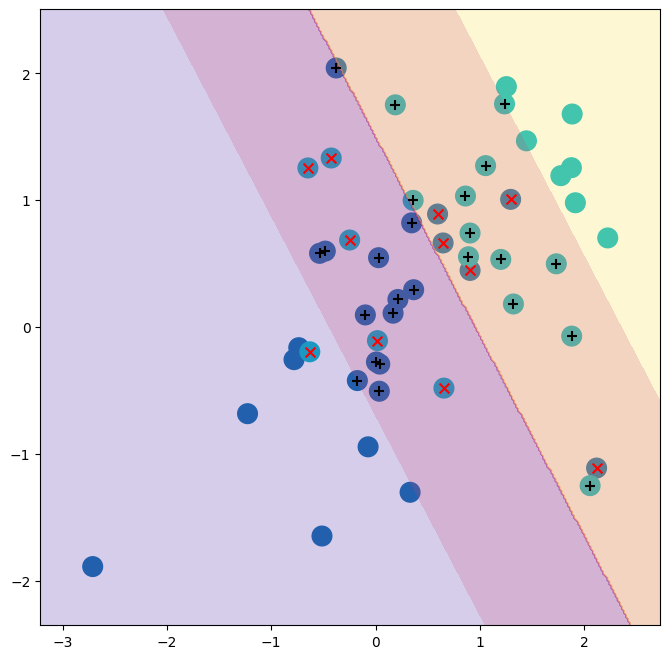

In [16]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X,y, svm_linear_small , ax=ax)

In [17]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

- CV로 초매개변수 최적화를 진행

In [21]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_linear,
{'C':[0.001,0.01,0.1,1,5,10,100]},
refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, y)
grid.best_params_
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

##### - 평가데이터에서 예측

In [24]:
X_test = rng.standard_normal((500, 2))
y_test = np.array([-1]*200+[1]*300)
X_test[y_test==1] += 1

best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,148,70
1,52,230


##### - 만약에 최적화된 C를 사용하지 않은 경우

In [26]:
svm_ = SVC(C=0.001, kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat, y_test)

Truth,-1,1
Predicted,,
-1,67,7
1,133,293


- 완벽하게 분리되는 경우

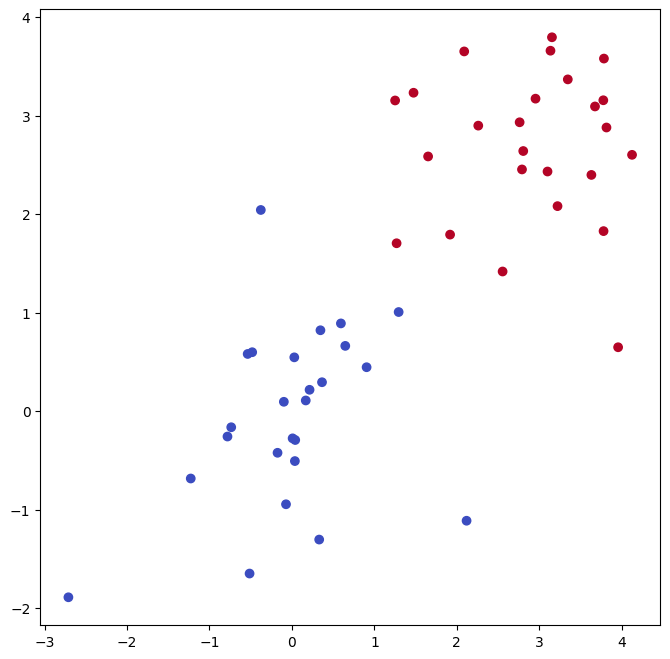

In [27]:
X[y==1] += 1.9;
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [28]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat, y)
# perfect fitting !!

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


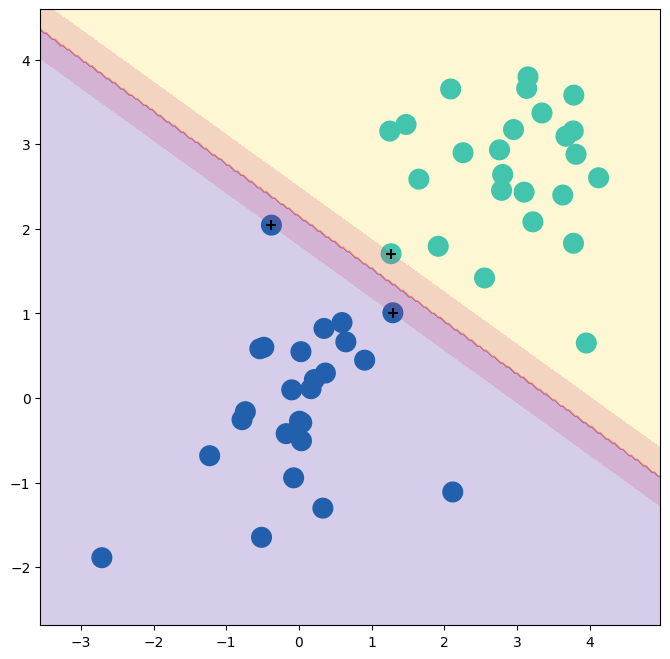

In [29]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X, y, svm_ , ax=ax)

- **SVM (비선형 경계)**




In [30]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

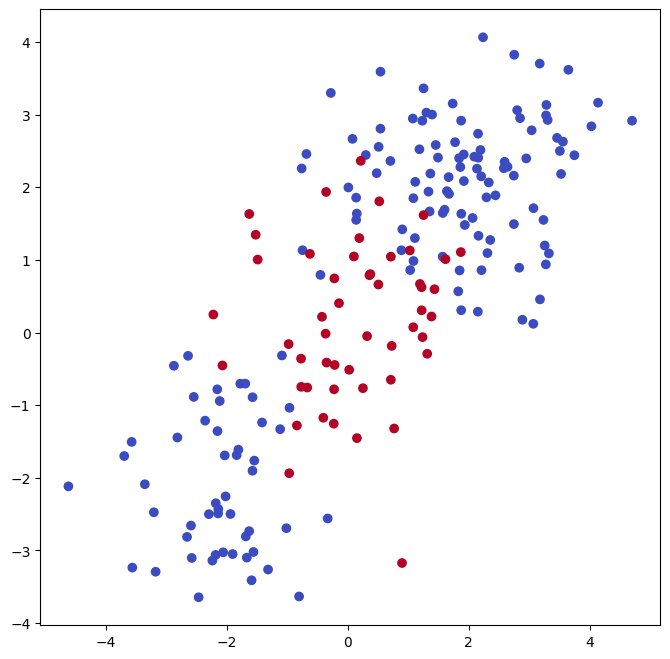

In [31]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],X[:,1],c=y, cmap=cm.coolwarm)

In [32]:
(X_train, X_test ,y_train, y_test) = skm.train_test_split(X, y, test_size=0.5, random_state=0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

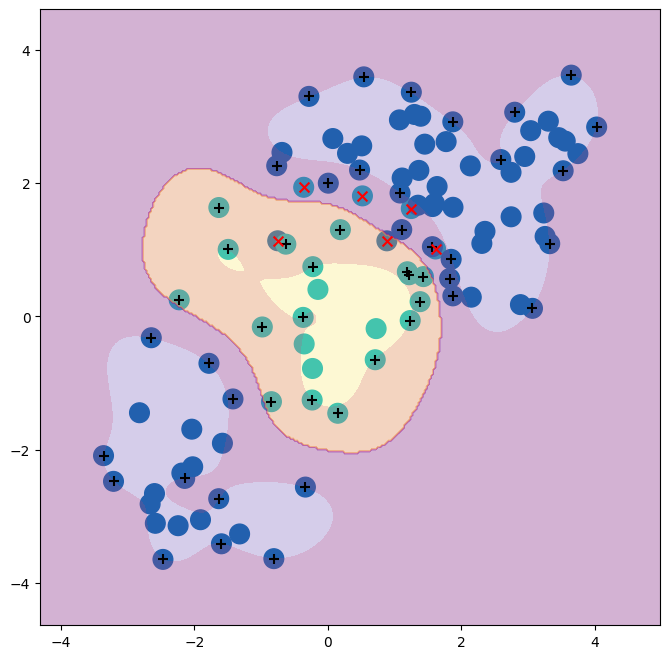

In [33]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train , svm_rbf , ax=ax)

##### - C값의 변화에 따라 서포트 벡터와 경계가 달라짐

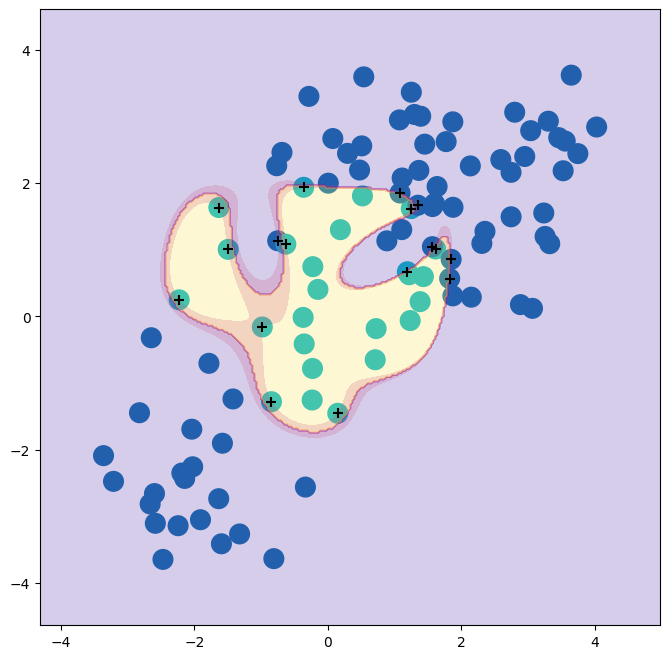

In [34]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train , svm_rbf , ax=ax)

##### - CV 로 최적의 초매개변수 파악

In [35]:
kfold = skm.KFold(5, random_state=0, shuffle=True)
grid = skm.GridSearchCV(svm_rbf,
{'C':[0.1,1,10,100,1000], 'gamma':[0.5,1,2,3,4]},
refit=True, cv=kfold, scoring='accuracy');
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

Truth,1,2
Predicted,,
1,69,5
2,6,20


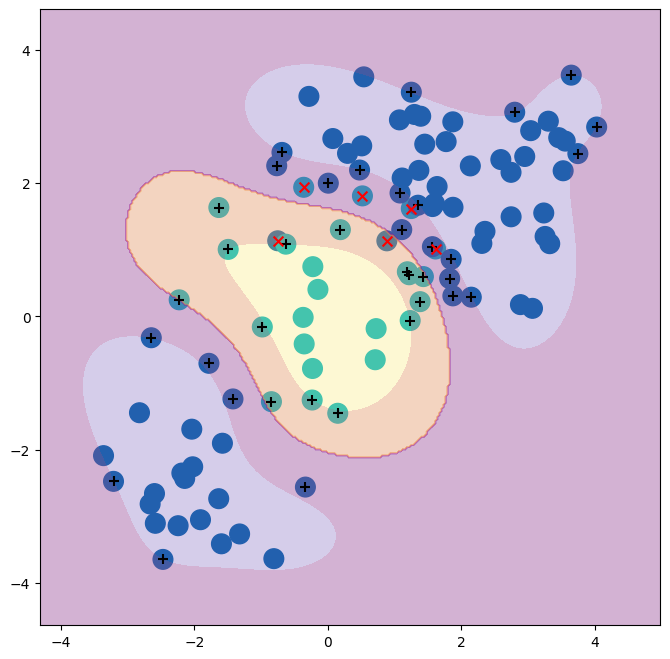

In [36]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train, y_train, best_svm, ax=ax)
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test, y_test)

- SVM ROC: 경계와 거리 값을 이용함에 유의

##### - CV 에서 최적의 선택인 경우 훈련데이터에서의 ROC

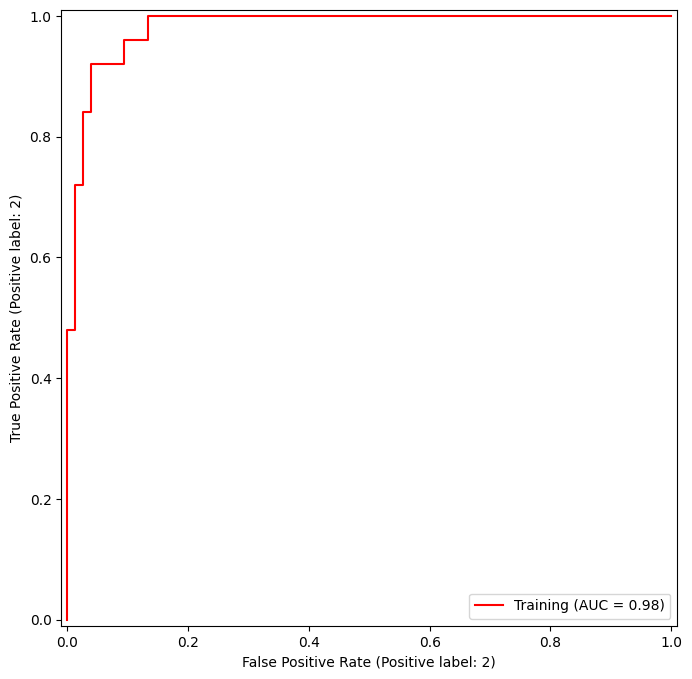

In [37]:
fig, ax = subplots(figsize=(8,8))
roc_curve(best_svm, X_train ,
y_train , name='Training', color='r', ax=ax);

##### - CV 에서 최적은 아니어도 훈련데이터에서 ROC가 좋을 수 있음

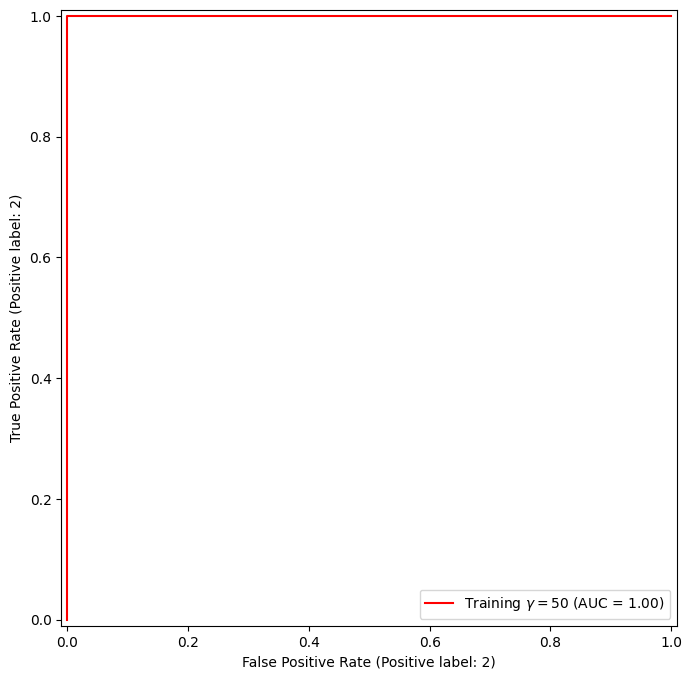

In [38]:
svm_flex = SVC(kernel="rbf", gamma=50, C=1)
svm_flex.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
roc_curve(svm_flex,
X_train ,
y_train ,
name='Training $\gamma=50$', color='r',
ax=ax);

##### -  평가데이터에서 ROC 그려봄 (CV 선택)

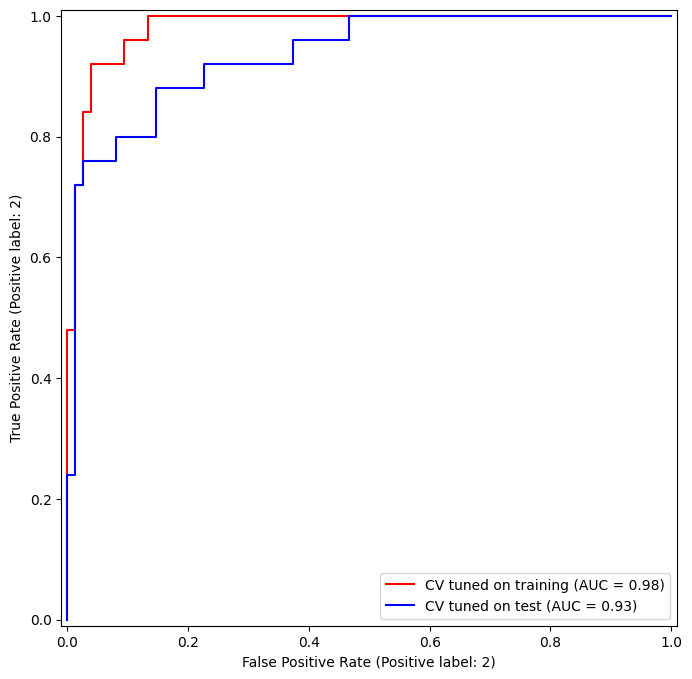

In [41]:
roc_curve(svm_flex, X_test ,
y_test, name='Test $\gamma=50$', color='b', ax=ax)
fig, ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip(
(X_train, X_test), (y_train, y_test),
('r', 'b'),
('CV tuned on training',
'CV tuned on test')):
    roc_curve(best_svm, X_, y_, name=name, ax=ax, color=c)

- 다중분류

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


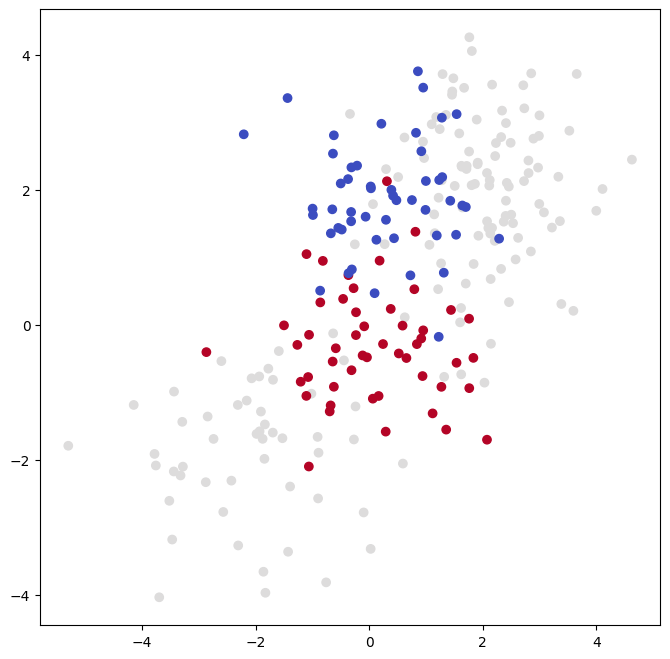

In [45]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

rng = np.random.default_rng(123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
print(y)
X[y==0,1] += 2
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

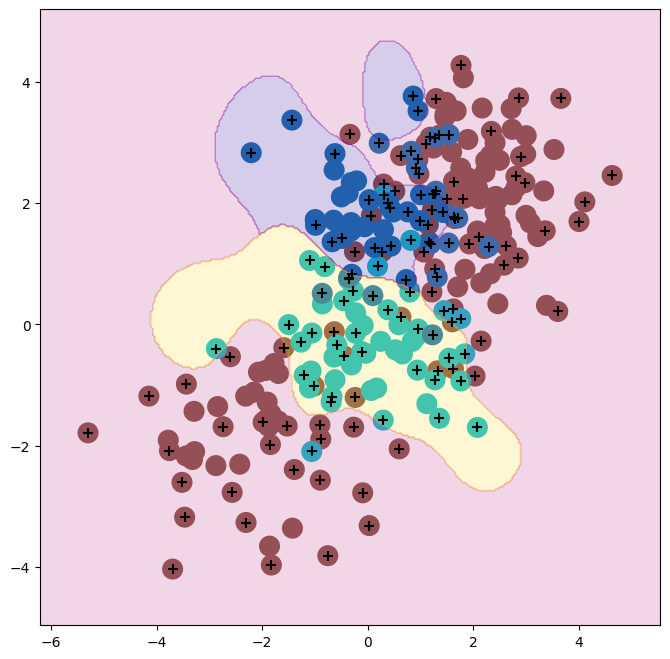

In [46]:
svm_rbf_3 = SVC(kernel="rbf", C=10, gamma=1, decision_function_shape='ovo');
svm_rbf_3.fit(X, y)
fig, ax = subplots(figsize=(8,8))
plot_svm(X, y,svm_rbf_3 , scatter_cmap=cm.tab10, ax=ax)

- 예제: Gene Expression Data

In [8]:
Khan = load_data('Khan')
Khan['xtrain'].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

In [9]:
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']),
Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20
